In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from konlpy.tag import Okt
import nltk
from sklearn.linear_model import LogisticRegression
import re

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yj0903/Review_Sentiment_Analysis/4_IT/data/04.%20IT%EA%B8%B0%EA%B8%B0.csv", encoding='utf-8', sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41357 entries, 0 to 41356
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            41357 non-null  int64  
 1   RawText          41357 non-null  object 
 2   Source           41357 non-null  object 
 3   Domain           41357 non-null  object 
 4   MainCategory     41357 non-null  object 
 5   ProductName      41357 non-null  object 
 6   ReviewScore      41357 non-null  int64  
 7   Syllable         41357 non-null  int64  
 8   Word             41357 non-null  int64  
 9   RDate            41357 non-null  int64  
 10  Aspects          41357 non-null  object 
 11  GeneralPolarity  36000 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 3.8+ MB


In [3]:
df['label'] = 0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41357 entries, 0 to 41356
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            41357 non-null  int64  
 1   RawText          41357 non-null  object 
 2   Source           41357 non-null  object 
 3   Domain           41357 non-null  object 
 4   MainCategory     41357 non-null  object 
 5   ProductName      41357 non-null  object 
 6   ReviewScore      41357 non-null  int64  
 7   Syllable         41357 non-null  int64  
 8   Word             41357 non-null  int64  
 9   RDate            41357 non-null  int64  
 10  Aspects          41357 non-null  object 
 11  GeneralPolarity  36000 non-null  float64
 12  label            41357 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 4.1+ MB


In [5]:
#ReviewScore 80, 4 이상 긍정적, 50이하, 2이하 부정적으로 지정

def tokenize_korean_text(text): 
  text_filtered = re.sub('[^,.?!\w\s]','', text)

  okt = Okt() 
  Okt_morphs = okt.pos(text_filtered) 

  words = []
  for word, pos in Okt_morphs:
    if pos == 'Adjective' or pos == 'Verb' or pos == 'Noun':
      words.append(word)

  words_str = ' '.join(words)
  return words_str

In [6]:
# X_texts = []
# y = []

# for ReviewScore, RawText in zip(df['ReviewScore'], df['RawText']):
#   if ReviewScore == 3 or 60 <= ReviewScore <=70: 
#     continue  
#      # 평점이 7, 60~70인 리뷰는 애매하기 때문에 학습데이터로 사용하지 않음

#   tokenized_comment = tokenize_korean_text(RawText)  # 위에서 만들었던 함수로 comment 쪼개기
#   X_texts.append(tokenized_comment)


#   y.append(1 if 5 >= ReviewScore > 3 else -1 or 1 if 100 >= ReviewScore >= 70 else -1)
#   #y.append(1 if ReviewScore >= 70 else -1)
#     # 평점이 8 이상이면(8,9,10) 값을 1로 지정 (positive)
#     # 평점이 3 이하이면(1,2,3) 값을 -1로 지정 (negative)

In [7]:
df['Score_change'] = df['ReviewScore'].replace({100:5,90:4.5,80:4.0,70:3.5,60:3.0,50:2.5,40:2.0,30:1.5,20:1.0,10:0.5,0:0})

In [8]:
# df['label'] == 0
# 긍부정 나누는 label 생성, 점수 3 이상 긍정 3 미만 부정 / 점수 70이상 긍정 그 미만 부정 
df['label'] = df['Score_change'].apply(lambda x: 1 if x > 3.5 else -1)

In [9]:
df.head()

,Index,RawText,Source,Domain,MainCategory,ProductName,ReviewScore,Syllable,Word,RDate,Aspects,GeneralPolarity,label,Score_change
0,3761,제품 만족합니다. 디자인이 깔끔하고 멋스럽네요. 배송도 빠르고 좋아요.^^ 생각보다...,SNS,IT기기,컴퓨터/주변기기,펠로우즈 레더렛 메모리폼 손목받침대 (91825),100,90,18,20220304,"[{'Aspect': '디자인', 'SentimentText': '디자인이 깔끔하고...",NaN,1,5.0
1,3762,가격대비! 좋아요! 음량도 크고! 구매하세요,SNS,IT기기,컴퓨터/주변기기,[엠피지오]소나보스/사운드바 스피커/PC스피커/컴퓨터스피커/2채널/USB전원,80,24,5,20210826,"[{'Aspect': '가격', 'SentimentText': '가격대비! 좋아요!...",1.0,1,4.0
2,3763,화질도 괜찮고 타사 제품에 비해 길이가 1M정도 더 길어서 좋아요,SNS,IT기기,컴퓨터/주변기기,플레오맥스 PM-MC1000 C타입 to HDMI 미러링케이블 4K UHD 유료미디...,100,36,10,20210330,"[{'Aspect': '화질', 'SentimentText': '화질도 괜찮고 ',...",1.0,1,5.0
3,3764,"입학축하선물로 노트북 뭘 살지 이것저것 다 찾아보다가, 결국 OOOO 22형으로 주...",SNS,IT기기,컴퓨터/주변기기,[22년 신모델] LG그램 15Z95P-GA5LK (i5-1155G7/16GB/...,100,165,30,20220205,"[{'Aspect': '제조일/제조사', 'SentimentText': '역시 명불...",NaN,1,5.0
4,3765,생각보다 상당히 빨리 받았네요. OO에서 직접 배송해주는거라 설치 기사가 직접 배송...,SNS,IT기기,컴퓨터/주변기기,(1TB 외장하드 패키지)삼성직배송/설치 고성능 프리미엄 노트북 Pen NT 930...,100,214,50,20180107,"[{'Aspect': '기능', 'SentimentText': '성능 또한 상당히 ...",0.0,1,5.0


In [10]:
X_texts = []
y = []

for Score_change, RawText in zip(df['Score_change'], df['RawText']):
  tokenized_comment = tokenize_korean_text(RawText)  # 위에서 만들었던 함수로 comment 쪼개기
  X_texts.append(tokenized_comment)
  y.append(1 if Score_change > 3.5 else -1)

In [11]:
print(f'원래 text 수: {len(df)}')
print(f'평점 4이상 텍스트 수: {len(X_texts)}')    

원래 text 수: 41357
평점 4이상 텍스트 수: 41357


In [40]:
df.head(10)

,Index,RawText,Source,Domain,MainCategory,ProductName,ReviewScore,Syllable,Word,RDate,Aspects,GeneralPolarity,label,Score_change
0,3761,제품 만족합니다. 디자인이 깔끔하고 멋스럽네요. 배송도 빠르고 좋아요.^^ 생각보다...,SNS,IT기기,컴퓨터/주변기기,펠로우즈 레더렛 메모리폼 손목받침대 (91825),100,90,18,20220304,"[{'Aspect': '디자인', 'SentimentText': '디자인이 깔끔하고...",NaN,1,5.0
1,3762,가격대비! 좋아요! 음량도 크고! 구매하세요,SNS,IT기기,컴퓨터/주변기기,[엠피지오]소나보스/사운드바 스피커/PC스피커/컴퓨터스피커/2채널/USB전원,80,24,5,20210826,"[{'Aspect': '가격', 'SentimentText': '가격대비! 좋아요!...",1.0,1,4.0
2,3763,화질도 괜찮고 타사 제품에 비해 길이가 1M정도 더 길어서 좋아요,SNS,IT기기,컴퓨터/주변기기,플레오맥스 PM-MC1000 C타입 to HDMI 미러링케이블 4K UHD 유료미디...,100,36,10,20210330,"[{'Aspect': '화질', 'SentimentText': '화질도 괜찮고 ',...",1.0,1,5.0
3,3764,"입학축하선물로 노트북 뭘 살지 이것저것 다 찾아보다가, 결국 OOOO 22형으로 주...",SNS,IT기기,컴퓨터/주변기기,[22년 신모델] LG그램 15Z95P-GA5LK (i5-1155G7/16GB/...,100,165,30,20220205,"[{'Aspect': '제조일/제조사', 'SentimentText': '역시 명불...",NaN,1,5.0
4,3765,생각보다 상당히 빨리 받았네요. OO에서 직접 배송해주는거라 설치 기사가 직접 배송...,SNS,IT기기,컴퓨터/주변기기,(1TB 외장하드 패키지)삼성직배송/설치 고성능 프리미엄 노트북 Pen NT 930...,100,214,50,20180107,"[{'Aspect': '기능', 'SentimentText': '성능 또한 상당히 ...",0.0,1,5.0
5,3766,1. 생각보다 배송 빠름 2. 설치 및 설정 쉬움 3. c타입 포트밖에 없다고 해서...,SNS,IT기기,컴퓨터/주변기기,(모라)삼성 프로 360 고급팩(NT950QDB-KC59G/N),100,209,58,20220307,"[{'Aspect': '조작성', 'SentimentText': '설치 및 설정 쉬...",NaN,1,5.0
6,3767,2월27일 저녁에 주문 3월5일 도착. 직접 설치했는데 설치가 어렵지는 않지만 배송...,SNS,IT기기,컴퓨터/주변기기,(모라)삼성 프로 360 고급팩(NT950QDB-KC59G/N),100,304,62,20220306,"[{'Aspect': '화질', 'SentimentText': '확실히 QLED가 ...",NaN,1,5.0
7,3768,배송지역마다 설치기사분 서비스가 다른가봅니다. 전 원주지역 설치기사분 오셨는데 그냥...,SNS,IT기기,컴퓨터/주변기기,(모라)삼성 프로 360 고급팩(NT950QDB-KC59G/N),100,124,27,20220305,"[{'Aspect': '소음', 'SentimentText': '제품 구동시 소음이...",NaN,1,5.0
8,3769,좋은 상품 저렴하게 구매했어요 OO 기사님 너무 친절하게 설치도 해주시고 설명도 잘...,SNS,IT기기,컴퓨터/주변기기,(모라)삼성 프로 360 고급팩(NT950QDB-KC59G/N),100,193,44,20220226,"[{'Aspect': '가격', 'SentimentText': '좋은 상품 저렴하게...",NaN,1,5.0
9,3770,배송까지 대략 3주정도 걸린다는점만 알고있으면 될듯해요! 배송전에 카톡으로 오...,SNS,IT기기,컴퓨터/주변기기,(방송)삼성 프로 360 기본팩(NT930QDB-KC39G),100,242,45,20220226,"[{'Aspect': '가격', 'SentimentText': '가격도 좋고', '...",NaN,1,5.0


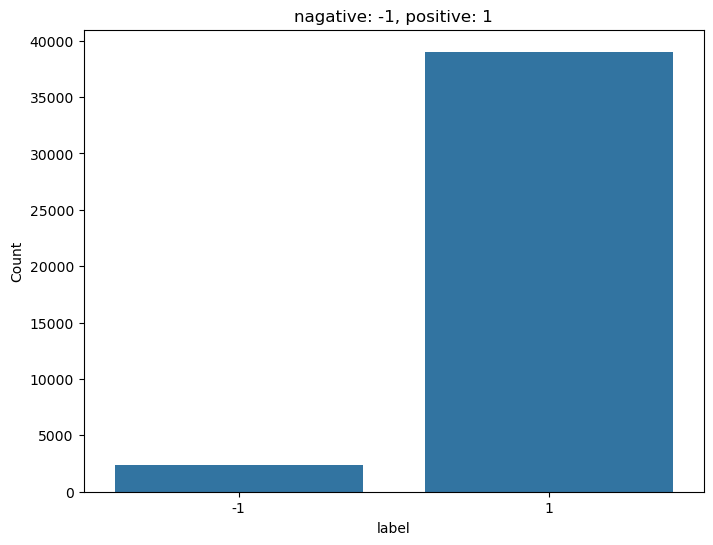

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('nagative: -1, positive: 1')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

In [14]:
# train_test_split
X_train_texts, X_test_texts, y_train, y_test = train_test_split(X_texts, y, test_size=0.2, random_state=0)

In [15]:
# CountVectorizer로 vector화
tf_vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))
X_train_tf = tf_vectorizer.fit_transform(X_train_texts)  # training data에 맞게 fit & training data를 transform
X_test_tf = tf_vectorizer.transform(X_test_texts) # test data를 transform

vocablist = [word for word, number in sorted(tf_vectorizer.vocabulary_.items(), key=lambda x:x[1])]  # 단어들을 번호 기준 내림차순으로 저장

In [16]:
## 확인해보기
print(X_train_tf[:1], '\n')
print(X_test_tf[:1], '\n')
print(vocablist[:3])

  (0, 11360)	1
  (0, 21535)	1
  (0, 6419)	1
  (0, 22981)	1
  (0, 23212)	1
  (0, 8941)	1
  (0, 15590)	1
  (0, 17059)	1
  (0, 4749)	1 

  (0, 5913)	1
  (0, 5932)	1
  (0, 6928)	1
  (0, 7285)	1
  (0, 10136)	1
  (0, 11862)	1
  (0, 13637)	1
  (0, 16812)	1
  (0, 17017)	1
  (0, 17558)	1
  (0, 17746)	1 

['가가', '가게', '가격']


In [17]:
model = LogisticRegression(C=0.1, penalty='l2', random_state=0)
model.fit(X_train_tf, y_train)  # 학습

LogisticRegression(C=0.1, random_state=0)

In [18]:
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=0.1, random_state=0)

In [19]:
y_test_pred = model.predict(X_test_tf)

print('Misclassified samples: {} out of {}'.format((y_test_pred != y_test).sum(), len(y_test)))
# print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))  # model.score(X_test_tf, y_test)로 계산해도 됨
print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')


Misclassified samples: 472 out of 8272
Accuracy: 0.9429400386847195


In [20]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, lr.predict(X_test)))

In [21]:
coefficients = model.coef_.tolist()

sorted_coefficients = sorted(enumerate(coefficients[0]), key=lambda x:x[1], reverse=True)
# coefficients(계수)가 큰 값부터 내림차순으로 정렬

print('긍정적인 단어 Top 10 (높은 평점과 상관관계가 강한 단어들)')
for word_num, coef in sorted_coefficients[:10]:
  print('{0:}({1:.3f})'.format(vocablist[word_num], coef))

print('\n부정적인 단어 Top 10 (낮은 평점과 상관관계가 강한 단어들)')
for word_num, coef in sorted_coefficients[-10:]: 
  print('{0:}({1:.3f})'.format(vocablist[word_num], coef))

긍정적인 단어 Top 10 (높은 평점과 상관관계가 강한 단어들)
최고(0.830)
좋아요(0.768)
좋습니다(0.766)
만족해요(0.743)
좋네요(0.726)
만족(0.669)
만족합니다(0.660)
만족스러워요(0.641)
감사해요(0.625)
감사합니다(0.604)

부정적인 단어 Top 10 (낮은 평점과 상관관계가 강한 단어들)
화나네요(-0.680)
안되서(-0.684)
별로(-0.695)
불만족(-0.736)
비추(-0.753)
반품(-0.762)
짜증나네요(-0.792)
안되고(-0.818)
실망(-1.053)
최악(-1.086)


In [35]:
# 긍정/부정 테스트용 함수 생성
def test(text):
    text_filtered = text.replace('.', '').replace(',', '').replace("'", "").replace('·', ' ').replace('=', '')
    okt = Okt()  # Corrected line
    Okt_morphs = okt.pos(text_filtered)

    words = []
    for word, pos in Okt_morphs:
        if pos == 'Adjective' or pos == 'Verb' or pos == 'Noun':
            words.append(word)
    words_str = ' '.join(words)

    # Assuming you have defined tf_vectorizer and model somewhere in your code
    new_text_tf = tf_vectorizer.transform([words_str])
    
    result = model.predict(new_text_tf)[0]

    if result == 1:
        print('긍정')
    else:
        print('부정')

In [37]:
test('안되서 화나네요 최악입니다')

부정


In [36]:
test('좋아요 최고')

긍정


In [51]:
import joblib

In [50]:
model_filename = 'sentiment_ITmodel.joblib'
vectorizer_filename = 'vectorizer.joblib'
joblib.dump(model, model_filename)
joblib.dump(tf_vectorizer, vectorizer_filename)

['vectorizer.joblib']

## 화장품 데이터

In [39]:
cosmetic_review = "https://raw.githubusercontent.com/yj0903/Review_Sentiment_Analysis/4_IT/data/02.%20%ED%99%94%EC%9E%A5%ED%92%88.csv"
df2 = pd.read_csv(cosmetic_review)
df2

,Index,RawText,Source,Domain,MainCategory,ProductName,ReviewScore,Syllable,Word,RDate,GeneralPolarity,Aspects
0,215137,유통기한도 넉넉하고 구성도 많아서 선물 하기 좋네요. 만족합니다.,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,100,39,8,20210920,1.0,"[{'Aspect': '유통기한', 'SentimentText': '유통기한도 넉넉..."
1,215140,구성도알차고촉촉하고너무좋아용,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,100,15,1,20210815,1.0,"[{'Aspect': '제품구성', 'SentimentText': '구성도알차고',..."
2,215143,대용량으로 넉넉하게 사용할 수 있고 무난하고 순한 편이네요 제품 구성은 좋으나 가격...,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,80,74,19,20210817,1.0,"[{'Aspect': '용량', 'SentimentText': '대용량으로 넉넉하게..."
3,215146,참존을 이 구성에 이 가격으로 사도 되나 싶은 생각이 드는 제품 양도 많아요,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,80,42,13,20210808,1.0,"[{'Aspect': '가격', 'SentimentText': '이 구성에 이 가격..."
4,215147,끈적임 없이 잘 흡수되어 매우 만족합니다,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,100,22,6,20210810,1.0,"[{'Aspect': '흡수력', 'SentimentText': '끈적임 없이', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
44991,690357,저희 아빠가 항상 다 쓰기 전에 미리 사 달라고 부탁하세요. 꾸준히 사용하시는 제품...,쇼핑몰,화장품,남성화장품,OO 온** 모이스처라이저 250ml 1개,5,128,32,20210513,1.0,"[{'Aspect': '향', 'SentimentText': '향이 너무 강하지도 ..."
44992,690359,이것저것 바르기 귀찮아하는 남편 올인원 로션으로 제격입니다. 매번 구매하는 제품입니...,쇼핑몰,화장품,남성화장품,OO 온** 모이스처라이저 250ml 1개,5,125,28,20210523,1.0,"[{'Aspect': '편의성/활용성', 'SentimentText': '이것저것 ..."
44993,690361,향기가 너무 좋습니다. 바르자 마자는 향이 조금 강하기는 합니다. 하지만 시간이 지...,쇼핑몰,화장품,남성화장품,OO 온** 모이스처라이저 250ml 1개,5,131,32,20210509,1.0,"[{'Aspect': '향', 'SentimentText': '향기가 너무 좋습니다..."
44994,690423,간편하게 하나만 발라도 되어서 신랑이 좋아하네요. 향기도 끝내줍니다. 제가 너무 좋...,쇼핑몰,화장품,남성화장품,OO 온** 모이스처라이저 250ml 1개,5,73,17,20180806,1.0,"[{'Aspect': '편의성/활용성', 'SentimentText': '간편하게 ..."


In [46]:
df2['Score_change'] = df2['ReviewScore'].replace({100:5,90:4.5,80:4.0,70:3.5,60:3.0,50:2.5,40:2.0,30:1.5,20:1.0,10:0.5,0:0})
df2['label'] = df2['Score_change'].apply(lambda x: 1 if x > 3.5 else -1)
df2.head(10)

,Index,RawText,Source,Domain,MainCategory,ProductName,ReviewScore,Syllable,Word,RDate,GeneralPolarity,Aspects,Score_change,label
0,215137,유통기한도 넉넉하고 구성도 많아서 선물 하기 좋네요. 만족합니다.,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,100,39,8,20210920,1.0,"[{'Aspect': '유통기한', 'SentimentText': '유통기한도 넉넉...",5.0,1
1,215140,구성도알차고촉촉하고너무좋아용,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,100,15,1,20210815,1.0,"[{'Aspect': '제품구성', 'SentimentText': '구성도알차고',...",5.0,1
2,215143,대용량으로 넉넉하게 사용할 수 있고 무난하고 순한 편이네요 제품 구성은 좋으나 가격...,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,80,74,19,20210817,1.0,"[{'Aspect': '용량', 'SentimentText': '대용량으로 넉넉하게...",4.0,1
3,215146,참존을 이 구성에 이 가격으로 사도 되나 싶은 생각이 드는 제품 양도 많아요,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,80,42,13,20210808,1.0,"[{'Aspect': '가격', 'SentimentText': '이 구성에 이 가격...",4.0,1
4,215147,끈적임 없이 잘 흡수되어 매우 만족합니다,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,100,22,6,20210810,1.0,"[{'Aspect': '흡수력', 'SentimentText': '끈적임 없이', ...",5.0,1
5,215154,엄마가 요번에는 참존 거 써 보고 싶대서 불렀는데 구성 알차다고 좋아하셨어요 이 가...,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,100,70,20,20210811,1.0,"[{'Aspect': '제품구성', 'SentimentText': '구성 알차다고 ...",5.0,1
6,215155,적립금 사용해서 저렴하게 구매했습니다 제품도좋아요 촉촉하면서 제형이 안끈적거려요,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,90,44,8,20210713,1.0,"[{'Aspect': '가격', 'SentimentText': '적립금 사용해서 저...",4.5,1
7,215157,"늘 쓰는 제품이네요 가격도 좋고,,,향도 괜찮고 끈적임 별로 없어 좋아요",쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,100,41,10,20210725,1.0,"[{'Aspect': '가격', 'SentimentText': '가격도 좋고,,,'...",5.0,1
8,215170,좋은 상품 구성이 많아 나눔할수있어서 잘쓰겠습니다 크림도 너무 흡수 잘되서 좋아요,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,100,45,11,20210508,1.0,"[{'Aspect': '제품구성', 'SentimentText': '좋은 상품 구성...",5.0,1
9,215171,향이 각기 다르고 점성이 부드러워서 발림성 좋았음,쇼핑몰,화장품,스킨케어,OO 프리미엄 GE라인 에스테틱 패키지 13종,100,27,7,20210509,1.0,"[{'Aspect': '향', 'SentimentText': '향이 각기 다르고',...",5.0,1
